<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [84]:
#!pip install psycopg2

In [85]:
import pandas as pd
import psycopg2

In [86]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [87]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host='84.201.134.129',
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [88]:
# текст запроса
query_3_1 = f'''
select count(*)
from vacancies
'''

In [89]:
# результат запроса
df_vacancies = pd.read_sql_query(query_3_1, connection)
df_vacancies

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\1490257461.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vacancies = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [90]:
# текст запроса
query_3_2 = f'''
select count(*)
from EMPLOYERS
'''

In [91]:
# результат запроса
df_employers = pd.read_sql_query(query_3_2, connection)
df_employers

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3337367508.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [92]:
# текст запроса
query_3_3 = f'''
select count(*)
from areas
'''

In [93]:
# результат запроса
df_areas = pd.read_sql_query(query_3_3, connection)
df_areas

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\2360458281.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_areas = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [94]:
# текст запроса
query_3_4 = f'''
select count(*)
from industries
'''

In [95]:
# результат запроса
df_industries = pd.read_sql_query(query_3_4, connection)
df_industries

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\1986887719.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_industries = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

#### Выводы по предварительному анализу данных:
В БД имеется: 49147 вакансий от 23501 работодателя в 294 видах деятельности. 

БД охватывает: 1362 региона

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [96]:
# текст запроса
query_4_1 = f'''
select 
    a.name as area,
    count(v.id) as cnt
from vacancies as v left join areas as a on v.area_id = a.id
group by area
order by cnt desc
limit 5
'''

In [97]:
# результат запроса
df_vacancies_cnt = pd.read_sql_query(query_4_1, connection)
df_vacancies_cnt

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\2413656130.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vacancies_cnt = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [98]:
# текст запроса
query_4_2 = f'''
select count(name)
from vacancies
where salary_from is not null or salary_to is not null
'''

In [99]:
# результат запроса
df_have_salary = pd.read_sql_query(query_4_2, connection)
df_have_salary

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3914861647.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_have_salary = pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [100]:
# текст запроса
query_4_3 = f'''
select 
    round(avg(salary_from)) as average_lower, 
    round(avg(salary_to)) as average_upper
from vacancies
'''

In [101]:
# результат запроса
df_avg_salary = pd.read_sql_query(query_4_3, connection)
df_avg_salary

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\4289725438.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_salary = pd.read_sql_query(query_4_3, connection)


,average_lower,average_upper
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [102]:
# текст запроса
query_4_4 = f'''
select 
    schedule,
    employment,
    count(id) as vacancies_count
from vacancies
group by schedule, employment
order by 3 DESC
limit 5
'''

In [103]:
# результат запроса
df_shed_empl = pd.read_sql_query(query_4_4, connection)
df_shed_empl

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\4217295568.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shed_empl = pd.read_sql_query(query_4_4, connection)


,schedule,employment,vacancies_count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [104]:
# текст запроса
query_4_5 = f'''
select 
    experience,
    count(id) as vacancies_count
from vacancies
group by experience
order by 2
'''

In [105]:
# результат запроса
df_exp_vacansies_count = pd.read_sql_query(query_4_5, connection)
df_exp_vacansies_count

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\1722104122.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_exp_vacansies_count = pd.read_sql_query(query_4_5, connection)


,experience,vacancies_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

#### Выводы по детальному анализу вакансий:

Наибольшее количество вакансий в наблюдается в столичных городах. Большая часть вакансий в размахом ЗП 71-110 тыс.руб. относится к числу вакансий с полным графиком.

Большая часть предлагаемых вакансий предусматривает опыт работы от 1 до 3 лет. Менее 15% предназначено для лиц без опыта работы.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [106]:
# текст запроса
query_5_1 = f'''
select 
    e.name,
    count(v.id) as vacancies_count
from vacancies as v left join employers as e on v.employer_id = e.id
group by e.name
order by 2 desc
limit 5
'''

In [107]:
# результат запроса
df_employers_top = pd.read_sql_query(query_5_1, connection)
df_employers_top

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\1065492714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_top = pd.read_sql_query(query_5_1, connection)


,name,vacancies_count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [108]:
# текст запроса
query_5_2 = f'''
select 
    a.name as area_name,
    count(e.id) as employers_count,
    count(v.id) as vacancies_count
from 
    areas as a
    left join employers as e on e.area = a.id
    left join vacancies as v on v.area_id = a.id
where v.id is null
group by a.id
order by employers_count desc
limit 1
'''

In [109]:
# результат запроса
df_too_more_employers = pd.read_sql_query(query_5_2, connection)
df_too_more_employers

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3133802380.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_too_more_employers = pd.read_sql_query(query_5_2, connection)


,area_name,employers_count,vacancies_count
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [110]:
# текст запроса
query_5_3 = f'''
select 
    e.name as employer_name,
    count(distinct  v.area_id) as areas_count
from 
    employers as e
    join vacancies as v on v.employer_id = e.id
group by e.id
order by areas_count desc
limit 1
'''

In [111]:
# результат запроса
df_employers_there = pd.read_sql_query(query_5_3, connection)
df_employers_there

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\1081306752.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_there = pd.read_sql_query(query_5_3, connection)


,employer_name,areas_count
0,Яндекс,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [112]:
# текст запроса
query_5_4 = f'''
select count(distinct e.id) as employers_count
from 
    employers as e
    left join employers_industries as i on e.id = i.employer_id
where i.industry_id is null
'''

In [113]:
# результат запроса
df_industry_have = pd.read_sql_query(query_5_4, connection)
df_industry_have

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3342909844.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_industry_have = pd.read_sql_query(query_5_4, connection)


,employers_count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [114]:
# текст запроса
query_5_5 = f'''
select 
    e.name as employers_name,
    count(distinct i.industry_id) as industry_count
from 
    employers as e
    left join employers_industries as i on e.id = i.employer_id
group by e.id
having count(distinct i.industry_id) = 4
order by 1
OFFSET 2 LIMIT 1
'''

In [115]:
# результат запроса
df_4_industry = pd.read_sql_query(query_5_5, connection)
df_4_industry

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3463811272.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_industry = pd.read_sql_query(query_5_5, connection)


,employers_name,industry_count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [116]:
# текст запроса
query_5_6 = f'''
select 
    count(distinct e.id) as employers_count
from   
    employers as e  
    left join employers_industries as ei on e.id = ei.employer_id
    join industries i ON i.id = ei.industry_id 
WHERE i.name = 'Разработка программного обеспечения'
'''

In [117]:
# результат запроса
df_development = pd.read_sql_query(query_5_6, connection)
df_development

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\324782590.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_development = pd.read_sql_query(query_5_6, connection)


,employers_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [118]:
# код для получения списка городов-милионников
from urllib.parse import quote_plus
url = quote_plus('https://ru.wikipedia.org/wiki/Города-миллионеры_России', safe=':/')
tables = pd.read_html(url)
mln_cities = tuple(tables[0]['Город'])
mln_cities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [119]:
# текст запроса
query_5_7 = f'''
    select
        a.name as region,
        count(*) as vacancies_count
    from
        vacancies as v
        join employers as e on v.employer_id = e.id
        join areas as a on v.area_id = a.id
    group by
        v.area_id, a.name, e.id, e.name
    having
        a.name in {mln_cities} and e.name = 'Яндекс'
    union all
    select
        'Total',
        sum(x.cnt)
    from
        (
        select
            count(*) as cnt
        from
            vacancies as v
            join employers as e on v.employer_id = e.id
            join areas as a on v.area_id = a.id
        group by
            v.area_id, a.name, e.id, e.name
        having
            a.name in {mln_cities} and e.name = 'Яндекс'
        ) as x
    order by 2
    '''

In [120]:
# результат запроса
df_yandex_mln = pd.read_sql_query (query_5_7, connection)
df_yandex_mln

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\614967379.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_yandex_mln = pd.read_sql_query (query_5_7, connection)


,region,vacancies_count
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

#### Выводы по анализу работодателей
Анализ работодателей показывает, что наибольшее количество вакансий компании находятся в Москве и СПб, однако их количество не столь велико в общей сумме. 

Города-миллионники азиатской части РФ за исключением Новосибирска - в числе отстающих. 

В целом, можно увидеть корреляцию между количеством вакансий и традиционными научными центрами страны.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [121]:
# текст запроса
query_6_1 = '''
select count(*)
from vacancies
where name ilike '%data%' or name ilike '%данн%'
'''

In [122]:
# результат запроса
df_data = pd.read_sql_query (query_6_1, connection)
df_data


C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\2057357111.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data = pd.read_sql_query (query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [123]:
# текст запроса
query_6_2 = '''SELECT COUNT(*)
FROM vacancies v
WHERE
    (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%')
    AND
    (v.name ILIKE '%junior%'
    OR v.experience = 'Нет опыта'
    OR v.employment ILIKE '%стажировка%');
'''

In [124]:
# результат запроса
df_for_ds_junior = pd.read_sql_query (query_6_2, connection)
df_for_ds_junior

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\202746083.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_for_ds_junior = pd.read_sql_query (query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [125]:
# текст запроса
query_6_3 = '''SELECT COUNT(*)
FROM vacancies v
WHERE
    (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%')
    AND
    (v.key_skills ILIKE '%SQL%'
    OR v.key_skills ILIKE '%postgres%')
'''

In [126]:
# результат запроса
df_know_sql = pd.read_sql_query (query_6_3, connection)
df_know_sql

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3737051778.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_know_sql = pd.read_sql_query (query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [127]:
# текст запроса
query_6_4 = '''SELECT COUNT(*)
FROM vacancies v
WHERE
    (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%')
    AND
    (v.key_skills ILIKE '%Python%')
'''

In [128]:
# результат запроса
df_know_ptn = pd.read_sql_query (query_6_4, connection)
df_know_ptn

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3606954508.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_know_ptn = pd.read_sql_query (query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [129]:
# текст запроса
query_6_5 = f'''
SELECT 
    round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2) as skills_count
FROM VACANCIES v
where 
(
  name ilike '%data scientist%'or
  name ilike '%data science%'or
  name ilike '%исследователь данных%'or
  (name like '%ML%' and name not ilike '%HTML%') or
  name ilike '%machine learning%' or name ilike '%машинн%обучен%'
)
'''

In [130]:
# результат запроса
df_skills_count = pd.read_sql_query (query_6_5, connection)
df_skills_count

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\2821147155.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_skills_count = pd.read_sql_query (query_6_5, connection)


,skills_count
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [152]:
# текст запроса
query_6_6 = f'''
SELECT 
    experience,
    ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) as average_salary
FROM VACANCIES v
where 
(
  name ilike '%data scientist%'or
  name ilike '%data science%'or
  name ilike '%исследователь данных%'or
  (name like '%ML%' and name not ilike '%HTML%') or
  name ilike '%machine learning%' or name ilike '%машинн%обучен%'
)
AND experience = 'От 3 до 6 лет'
AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
'''

In [153]:
# результат запроса
df_experience = pd.read_sql_query (query_6_6, connection)
df_experience

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\3462669927.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_experience = pd.read_sql_query (query_6_6, connection)


,experience,average_salary
0,От 3 до 6 лет,243115.0


***

#### Выводы по предметному анализу
- По Данным анализа к сфере Анализа данных относится 1771 позиция (более 3%). При этом, менее 3% из них предназначен для людей без опыта, с отметкой junior или для стажировки. 
- Python  в целом имеет несколько большую популярность у работодателей, чем SQL. Обычно, указывается 6-7 навыков. 
- Средняя зарплата Data-Scientist'а с опытом работы в данной базе составила 243115 руб./мес.

# Дополнительные исследования данных

In [155]:
import matplotlib.pyplot as plt

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\2520310339.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_experience = pd.read_sql_query (query_0_1, connection)


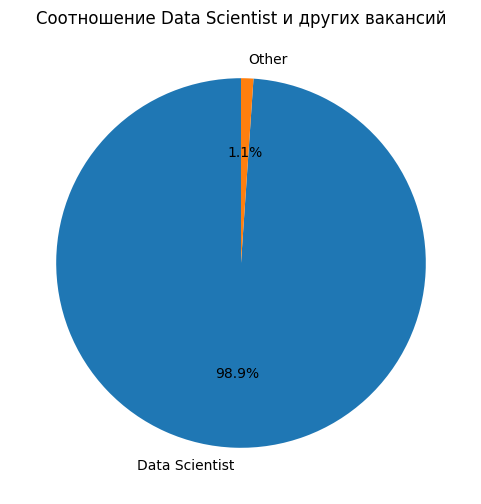

In [171]:
query_0_1 = '''SELECT COUNT(*)
FROM vacancies v
WHERE
    (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%')
UNION ALL
SELECT COUNT(*)
FROM vacancies v
'''

df_experience = pd.read_sql_query (query_0_1, connection)
# строим диаграмму
labels = ['Data Scientist', 'Other']
counts = df_experience['count']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение Data Scientist и других вакансий')
plt.show()

Вывод: Из графика видно что по данным имеющегося дата сэта в настоящее время среди всех вакансий чуть более 1% касается анализа данных.

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\244020520.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dst_count = pd.read_sql_query (query_0_2, connection)


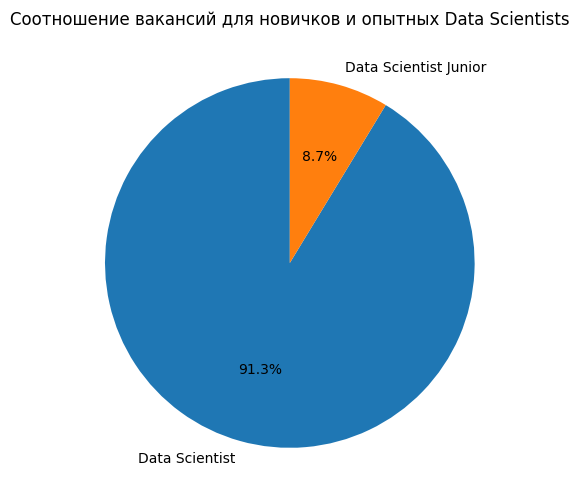

In [173]:
query_0_2 = '''SELECT COUNT(*)
FROM vacancies v
WHERE
    (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%')
UNION ALL
SELECT COUNT(*)
FROM vacancies v
WHERE
    (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%')
    AND
    (v.name ILIKE '%junior%'
    OR v.experience = 'Нет опыта'
    OR v.employment ILIKE '%стажировка%')
'''
df_dst_count = pd.read_sql_query (query_0_2, connection)
# строим диаграмму
labels = ['Data Scientist', 'Data Scientist Junior']
counts = df_dst_count['count']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение вакансий для новичков и опытных Data Scientists')
plt.show()

 Вывод: Диаграмма показывает что почти 9% работодателей готовы принимать на работу Data Scientists соискателей без опыта работы.

C:\Users\Караваев\AppData\Local\Temp\ipykernel_12764\523747171.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_experience_salary = pd.read_sql_query (query_0_1, connection)


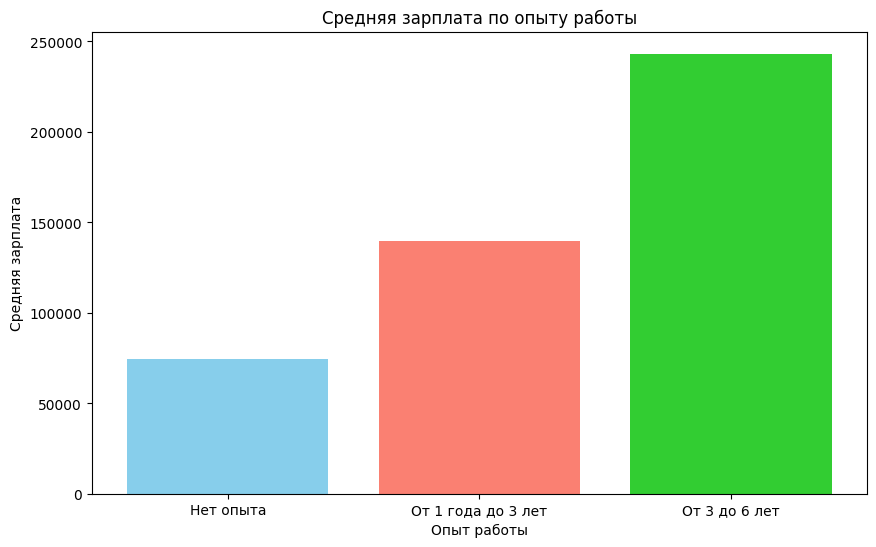

In [164]:
query_0_2 = f'''
SELECT 
    experience,
    ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) as average_salary
FROM VACANCIES v
where 
(
  name ilike '%data scientist%'or
  name ilike '%data science%'or
  name ilike '%исследователь данных%'or
  (name like '%ML%' and name not ilike '%HTML%') or
  name ilike '%machine learning%' or name ilike '%машинн%обучен%'
)
AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
'''

df_experience_salary = pd.read_sql_query (query_0_2, connection)
# строим диаграмму
experience = df_experience_salary['experience']
average_salary = df_experience_salary['average_salary']
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['skyblue', 'salmon', 'limegreen']
ax.bar(experience, average_salary, color=colors)
plt.title('Средняя зарплата по опыту работы')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя зарплата')
plt.show()

Вывод: Зарплата Data Scientists растет практически в арифмитической прогрессии при достижении нового уровня опыта. То ессть новичек Data Scientists уже через год работы может претендовать на оплату почти в два раза выше.

#### Вывод по дополнительному исследованию

На мой взгляд такой резкий рост оплаты в зависимости от опыта говорит о недостатке специалистов в данной сфере. 

Вероятно работодателям следует уделить больше внимания выращиванию опытных Data Scientists из специалистов без опыта, то есть чащей искать людей без опыта но готовых к обучению. Так как в настоящее время на рынке труда сохраняется тренд на сокращение безработицы и сами по себе специалисты с опытом ни от куда не возьмутся.

# Общий вывод по проекту

### Подведем итог исследования, обобщите выводы:

- В целом проведенный анализ показал наличие вакансий в сфере Data-Science в России, однако количество их для начинающих специалистов было относительльно невелико. 
- SQL является более подходящим инструментом для работы с БД, чем Excel, так как последний тратит слишком много времени для анализа таких объемов информации.
- При дальнейшей практике в этой области, появляется возможность делать самые различные запросы по разным критериям.